Nous allons travailler sur des données médicales servant a prédire si les une patiente est atteinte du cancer du sein (Si la tumeur est bénigne ou maligne)

In [1]:
import csv

Téléchargement des données et nettoyage (toutes les valeurs nulles sont retirées)

In [2]:
file = open("data.csv","r")
Provdata= list(csv.reader(file, delimiter=","))
file.close()
#print(data)
data=[]
data.append(Provdata[0])

counter=0
nulldata=0
for e in range(1,len(Provdata)):
    nulldata=0
    for i in range(2,len(Provdata[e])):
        if(float(Provdata[e][i])==0):
            #print("ligne ",e," colonne ",i)
            #print(data[e])
            #data.remove(data[e])
            nulldata=1
    if(nulldata==0):
        data.append(Provdata[e])
    counter+=1

print(len(data))

557


Dans ce data set les valeurs sont M pour malignes et B pour Bénignes on va donc les ramener a des valeurs numérique 0 et 1

In [3]:
for i in range(1,len(data)):
    if(data[i][1]=='M'):
        data[i][1]=float(1)
    else:
        data[i][1]=float(0)

Le chargement des données du fichier csv nous donne des valeurs en String nous devons donc ramener ces valeurs a des valeurs numériques

In [4]:
for i in range(1,len(data)):
    for e in range(0,len(data[i])):
        data[i][e]=float(data[i][e])

On passe maintenant notre dataset en DataFrame

In [5]:
import pandas as pd

rowData=data[1:]
labels=data[0]
type(labels)
labels=labels[:-1]
labels



data=pd.DataFrame(rowData)
data.columns=labels

In [6]:
data.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302.0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517.0,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903.0,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301.0,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402.0,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786.0,1.0,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359.0,1.0,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202.0,1.0,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981.0,1.0,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001.0,1.0,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


On retire la première colonne car elle correspond aux identifiants des patients et pourrait ainsi fausser les résultats

In [7]:
data=data.drop('id',axis=1)

In [8]:
data.head(20)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,1.0,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,1.0,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,1.0,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,1.0,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,1.0,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


On souhaite maintenant avoir une idée de la forme de notre dataset on va donc regarder si il est équilibré ou non

In [9]:
result=data['diagnosis']
result=result.drop(0)

cancer=0
nocancer=0

for i in range(1,550):
    if(result[i]==0):
        nocancer+=1
    else:
        cancer+=1
print(cancer,nocancer)


205 344


<function matplotlib.pyplot.show(close=None, block=None)>

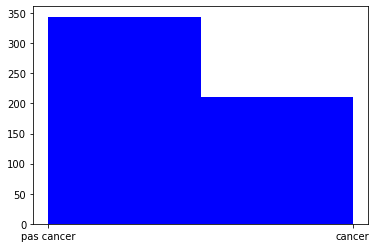

In [10]:
import matplotlib.pyplot as plt

plt.hist(result,bins=2,color='blue')
plt.xticks([0,1],["pas cancer","cancer"])
plt.show

On remarque donc que notre data set n'est pas équilibré on va procéder a un sur échantillonage

In [11]:
filtered_ds = data.loc[data['diagnosis'] == 1]
balanced_ds = pd.concat([data, filtered_ds])    # Sur-echantillonage de notre dataset
balanced_ds.reset_index(drop=True, inplace=True)
data=balanced_ds

In [12]:
result=data['diagnosis']
result=result.drop(0)

cancer=0
nocancer=0

for i in range(1,550):
    if(result[i]==0):
        nocancer+=1
    else:
        cancer+=1
print(cancer,nocancer)

205 344


<function matplotlib.pyplot.show(close=None, block=None)>

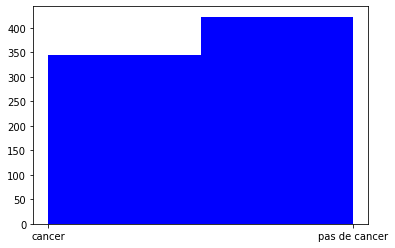

In [13]:
import matplotlib.pyplot as plt

plt.hist(result,bins=2,color='blue')
plt.xticks([0,1],["cancer","pas de cancer"])
plt.show

On va maintenant séparer nos données afin de pouvoir entraine nos différents modèles 

In [14]:
from sklearn.model_selection import train_test_split
y=data['diagnosis']
x=data.iloc[:,1:]
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.3)

Nos données ne sont pas toutes a la même échelle on va donc les normaliser

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_normalise=scaler.fit_transform(X_train)

X_test_normlise=scaler.fit_transform(X_test)

Nous sommes face a un projet de classification nous alloons pour le résoudre utiliser les algorithme DecisionTree RandomForest et KNeighbors

Nous utilisons DecisionTree car : notre dataset n'est pas très gros et cet algorithme est performant sur ce type de dataSet, en revanche, il overfitt souvent c'est pourquoi nous utilisons RandomForest qui lui overfitt beaucoup moins

Nous utilisons également kneighbors car il est efficace sur les petits dataset

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest=RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
forest.fit(X_train_normalise,y_train)

ypredictionForest=forest.predict(X_test_normlise)
accuracy_score(y_test,ypredictionForest)

0.948051948051948

In [17]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier()

tree.fit(X_train_normalise,y_train)
y_prediciton_tree=tree.predict(X_test_normlise)
accuracy_score(y_prediciton_tree,y_test)

0.922077922077922

In [18]:
from sklearn.neighbors import KNeighborsClassifier
kvoisins = KNeighborsClassifier(n_neighbors=3)

kvoisins.fit(X_train_normalise,y_train)
y_prediction_voisin=kvoisins.predict(X_test_normlise)
accuracy_score(y_prediction_voisin,y_test)

0.961038961038961

Nous obtenons des scores très élevés nous allons donc procéder a une crossvalidation pour vérifier si nos modèles n'overfitt pas 

In [19]:
from sklearn.model_selection import cross_val_score
x_normlise=scaler.fit_transform(x)

scores =cross_val_score(tree,x_normlise,y,cv=5)


print('Cross-validation scores:', scores)
print('Average score:', scores.mean())
print('Standard deviation:', scores.std())
scoretree=scores.mean()

Cross-validation scores: [0.96103896 0.98701299 0.98051948 0.98039216 0.94117647]
Average score: 0.9700280112044819
Standard deviation: 0.016847493971733223


In [20]:
scores =cross_val_score(forest,x_normlise,y,cv=5)


print('Cross-validation scores:', scores)
print('Average score:', scores.mean())
print('Standard deviation:', scores.std())
scoreforest=scores.mean()

Cross-validation scores: [0.95454545 0.99350649 0.98051948 0.9869281  0.97385621]
Average score: 0.9778711484593838
Standard deviation: 0.013369471685505004


In [21]:
scores =cross_val_score(kvoisins,x_normlise,y,cv=5)


print('Cross-validation scores:', scores)
print('Average score:', scores.mean())
print('Standard deviation:', scores.std())
scorevoisins=scores.mean()

Cross-validation scores: [0.94805195 0.97402597 0.98051948 0.98039216 0.92156863]
Average score: 0.9609116373822257
Standard deviation: 0.023018201569423163


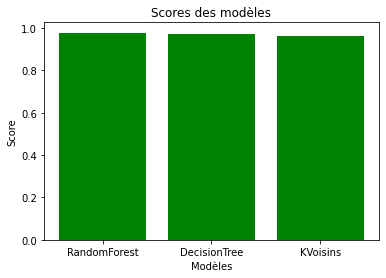

In [22]:
labels = ["RandomForest", "DecisionTree", "KVoisins"]
scores = [scoreforest, scoretree, scorevoisins]

plt.bar(labels, scores, color='green')
plt.title("Scores des modèles")
plt.xlabel("Modèles")
plt.ylabel("Score")
plt.show()

On remarque donc avec les crossvalidations que en moyenne le meilleur algorithme sur notre dataset est RandomForest même si les scores restent très proches et que les modèles n'overfittent pas

On va donc maintenant modifier les hyperparamètres

On va donc utiliser un gridSearch avec un certains nombre de valeurs pour déterminer les meilleurs hyperparamètres
Nous choisissons les paramètres maxdepth qui représe la profondeur max de chacun des arbres, n_estimators le nombre d'arbres et min_samples_split qui représente la valeur minimal requise pour diviser un noeud interne de l'arbre de decision en sous noeud. On considère que plus la valeur est grande plus la profondeur de l'arbre sera petite et aura moins de feuilles ce qui conduit a limiter l'overfitting

les valeurs de min_samples souvent selectionnée par le GridSearch sont petites car RandomForest n'overfitt que très peu on chercher donc a augmenter la profondeur des arbres générés

pour le nombre d'arbres plus il est faible plus la complexité diminue mais on risque de voir de l'overfitting

la profondeur de l'arbre augmente l'accuracy mais peut entrainer de l'overfitting on chercher donc a avoir une profondeur moyenne


In [23]:
from sklearn.model_selection import GridSearchCV

forest=RandomForestClassifier()

parametre = {
    'n_estimators': [5, 10, 50, 100, 200],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(forest, param_grid=parametre, cv=5)
grid_search.fit(X_train_normalise, y_train)

best_parameters=grid_search.best_params_

# Afficher les meilleurs hyperparamètres trouvés
print(grid_search.best_params_)
y_prediction_hyperparametre=grid_search.predict(X_test_normlise)
accuracy_score(y_prediction_hyperparametre,y_test)

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 10}


0.9653679653679653

In [24]:
scores =cross_val_score(grid_search,x_normlise,y,cv=5)


print('Cross-validation scores:', scores)
print('Average score:', scores.mean())
print('Standard deviation:', scores.std())

Cross-validation scores: [0.96753247 0.99350649 0.98701299 0.98039216 0.9869281 ]
Average score: 0.9830744418979712
Standard deviation: 0.008808384353599055


On remarque donc que avec la selection des hyperparamètres l'accuracy moyenne augmente

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_prediction_hyperparametre)
confusion_matrix

array([[ 96,   4],
       [  4, 127]])

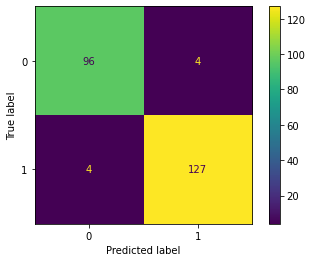

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()
plt.show()

On remarque que certe les faux négatifs sont plus élevés que les faux positifs mais l'ordre de grandeur est tellement faible que ce résultat n'est pas exploitable

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train_normalise)
X_test_pca=pca.fit_transform(X_test_normlise)

profondeur=best_parameters['max_depth']
min=best_parameters['min_samples_split']
nb=best_parameters['n_estimators']


#kvoisinspca=KNeighborsClassifier(n_neighbors=nbkn,weights=weight,algorithm=algo)
#kvoisinspca.fit(X_train_pca,y_train)

forest=RandomForestClassifier(max_depth=profondeur,min_samples_split=min, n_estimators=nb)
forest.fit(X_train_pca,y_train)
#grid_search.fit(X_train_pca,y_train)
y_prediction_forest_pca=forest.predict(X_test_pca)
#y_prediction_kn_pca=grid_search.predict(X_test_pca)
accuracy_score(y_prediction_forest_pca,y_test)



0.9090909090909091

In [35]:
x_pca_normalise=pca.fit_transform(x_normlise)
scores =cross_val_score(grid_search,x_pca_normalise,y,cv=5)


print('Cross-validation scores:', scores)
print('Average score:', scores.mean())
print('Standard deviation:', scores.std())

Cross-validation scores: [0.96753247 0.98051948 0.99350649 0.98039216 0.93464052]
Average score: 0.9713182242594007
Standard deviation: 0.020094299662411916


Après le test avec les données en pca on remarque que l'accuracy n'augmente pas

Soit les données sont très corrélées et donc on observe une perte d'information

soit elles ont une structure non linéaire

on va donc dans un premier temps déterminer la matrice de correlation

In [29]:
matrice_correlation = data.corr()

In [30]:
matrice_correlation['diagnosis']

diagnosis                  1.000000
radius_mean                0.701342
texture_mean               0.443561
perimeter_mean             0.713365
area_mean                  0.661946
smoothness_mean            0.365254
compactness_mean           0.568930
concavity_mean             0.667392
concave points_mean        0.742797
symmetry_mean              0.334455
fractal_dimension_mean    -0.007413
radius_se                  0.521418
texture_se                 0.029234
perimeter_se               0.507112
area_se                    0.487661
smoothness_se             -0.053716
compactness_se             0.283213
concavity_se               0.260772
concave points_se          0.400917
symmetry_se                0.014741
fractal_dimension_se       0.084534
radius_worst               0.743113
texture_worst              0.476317
perimeter_worst            0.749852
area_worst                 0.681976
smoothness_worst           0.419706
compactness_worst          0.554764
concavity_worst            0

In [31]:
total=0
corr=0

for e in matrice_correlation['diagnosis']:
    if(e>0.5):
        corr+=1
    total+=1

print(total,corr)

31 15


On remarque donc que la moitié des features sont corrélées a plus de 50% (15/31) elle sont donc fortement corrélées ce qui pourrait expliquer une PCA qui affaiblit l'accuracy

On peut donc conclure que le modèle randomforest apporche des 98% de prédiction ce qui est énorme cependant les modèles n'overfittent pas. 

Le dataset est petit ce qui peut donc expliquer un score très élevé